## A.GARCH vs SV Volatility Interpretation

### 1. Import Libraries

In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from arch import arch_model  
from statsmodels.tsa.stattools import adfuller  


### 2. Load Crypto Data

In [7]:
# Define paths
paths = {
    'BTC': '../data/bitcoin.csv',
    'ETH': '../data/ethereum.csv',
    'SOL': '../data/solana.csv',
    'ADA': '../data/cardano.csv'
}

# Load data into dictionary
data = {}
for coin, path in paths.items():
    df = pd.read_csv(path)
    df['date'] = pd.to_datetime(df['timestamp'])
    df.set_index('date', inplace=True)
    df.rename(columns={df.columns[1]: 'price'}, inplace=True)
    data[coin] = df

### 3.Calculate Log Returns

In [8]:
for coin in data:
    data[coin]['returns'] = np.log(data[coin]['price'] / data[coin]['price'].shift(1)) * 100
    data[coin].dropna(inplace=True)

### 4.Fit GARCH(1,1) Model for Each Coin

In [9]:
from arch import arch_model

models = {}
results = {}
for coin in data:
    model = arch_model(data[coin]['returns'], vol='Garch', p=1, q=1)
    results[coin] = model.fit(disp='off')
    data[coin]['volatility'] = results[coin].conditional_volatility

### 5.Save Volatility Data

In [ ]:
for coin in data:
    data[coin][['returns', 'volatility']].to_csv(f"outputs/{coin}_volatility.csv")
import os

# Create outputs directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)


### 6.Plot Volatility

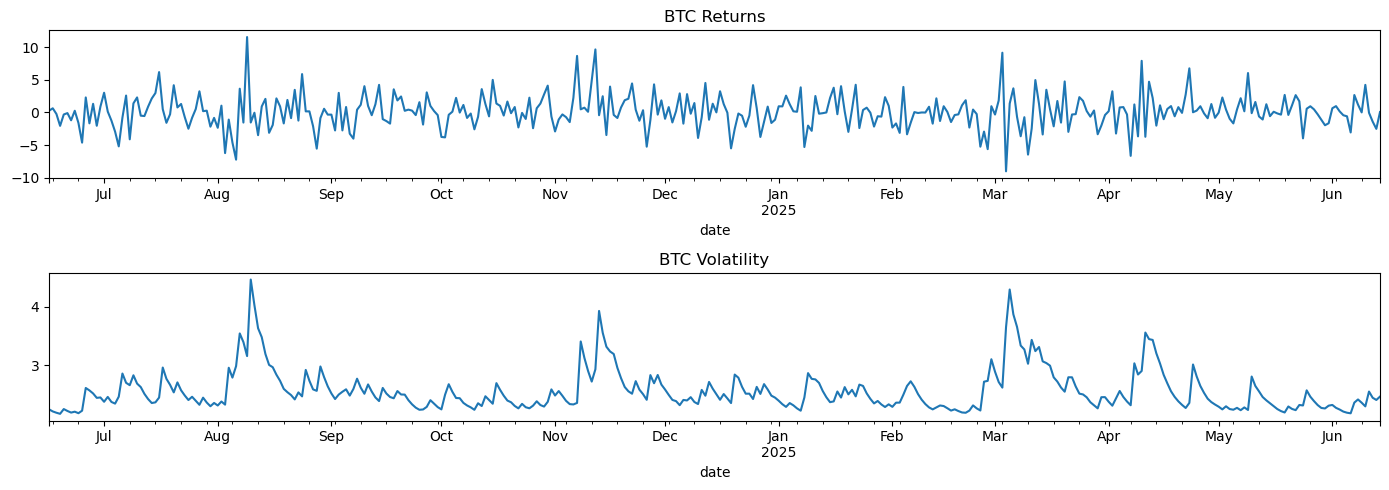

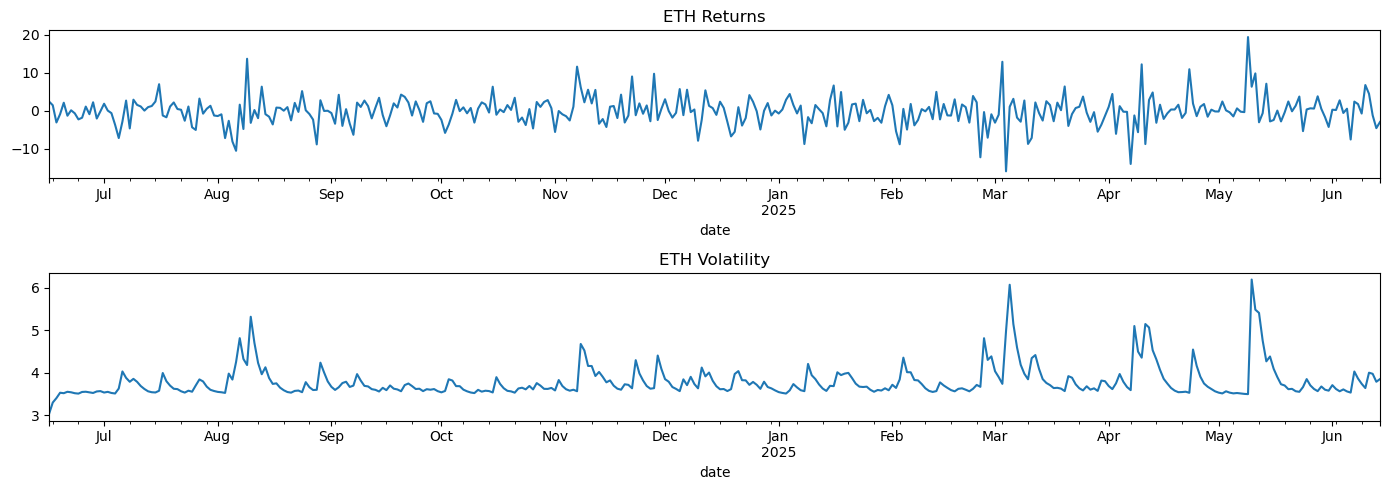

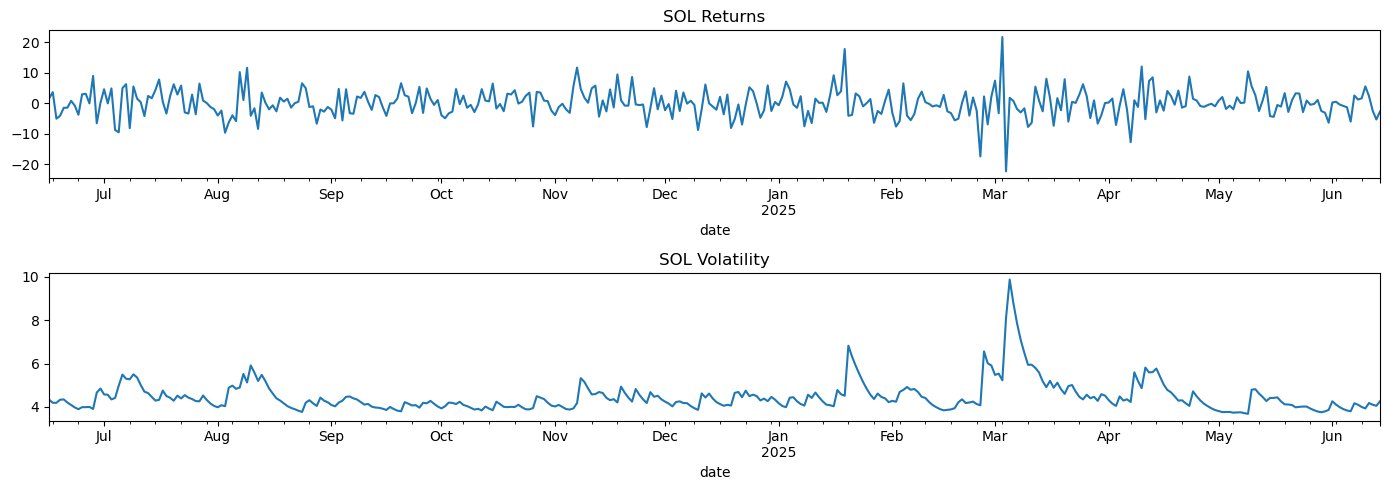

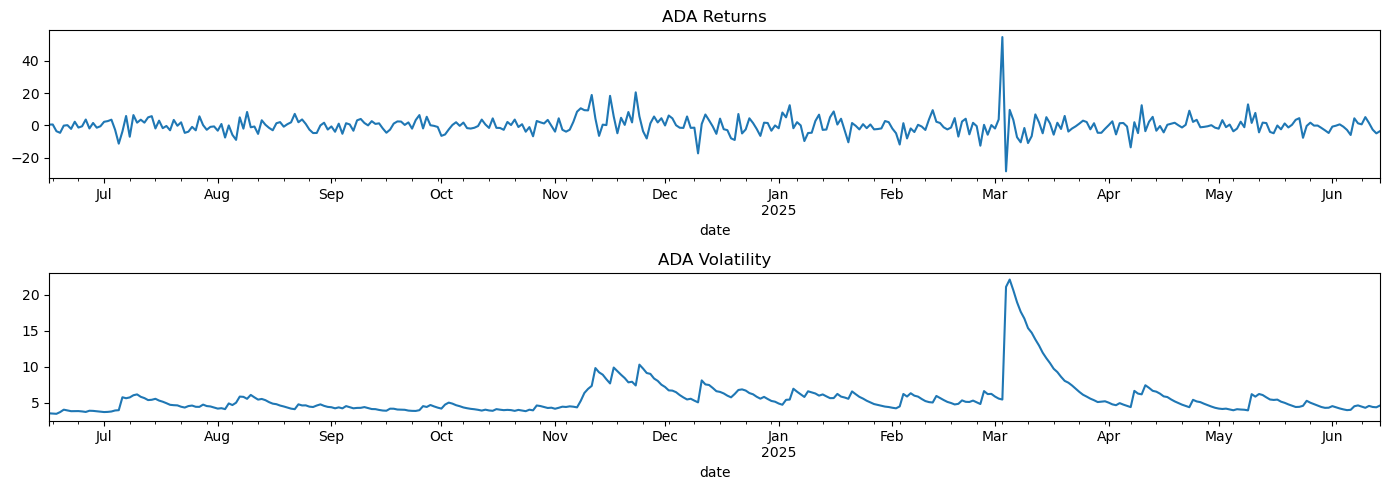

In [13]:
import matplotlib.pyplot as plt

for coin in data:
    plt.figure(figsize=(14, 5))
    plt.subplot(2, 1, 1)
    data[coin]['returns'].plot(title=f'{coin} Returns')
    plt.subplot(2, 1, 2)
    data[coin]['volatility'].plot(title=f'{coin} Volatility')
    plt.tight_layout()
    plt.show()

## 📈 Cryptocurrency Volatility & Return Analysis (2024-06-15 to 2025-06-15)

### ✅ Overview
This section provides a comparative analysis of volatility and returns for **Bitcoin (BTC)**, **Ethereum (ETH)**, **Solana (SOL)**, and **Cardano (ADA)** over the last year. Each asset is analyzed for return behavior and volatility trends.

---

### 🟩 1. Bitcoin (BTC)

#### 📊 Returns:
- Moderate fluctuations, relatively consistent.
- Few noticeable spikes, both positive and negative.
- Indicates stable investor confidence.

#### 🌪️ Volatility:
- Mostly stable with a few sharp increases:
  - **August**, **March**, **May** show distinct peaks.
- Indicates external events causing temporary uncertainty.

#### 🧠 Interpretation:
Bitcoin shows **mature and stable market behavior**. It is suitable for **conservative investors** and **portfolio anchors**.

---

### 🟦 2. Ethereum (ETH)

#### 📊 Returns:
- Higher frequency of spikes than BTC.
- Sudden movements suggest strong reaction to market news.

#### 🌪️ Volatility:
- **More reactive** than BTC, with **frequent spikes**.
- Peaks observed around **August**, **March**, and **May**.

#### 🧠 Interpretation:
ETH is **volatile but predictable**. Suitable for **active traders** looking for short-term profits.

---

### 🟨 3. Solana (SOL)

#### 📊 Returns:
- Large swings and noise, especially visible in **Jan** and **March**.
- Indicates high speculation or rapid momentum shifts.

#### 🌪️ Volatility:
- High and **persistent volatility** after events.
- Significant spikes in **Feb-March**.

#### 🧠 Interpretation:
SOL is **highly reactive** and suitable for **risk-tolerant investors**. Likely to experience **frequent, large price changes**.

---

### 🟧 4. Cardano (ADA)

#### 📊 Returns:
- Extreme spikes, most notably in **early March**.
- Suggests major market-moving news or events.

#### 🌪️ Volatility:
- Sharp, isolated spike in **March**, then drops.
- Indicates **event-driven volatility** rather than consistent trend.

#### 🧠 Interpretation:
ADA is driven by **external events**, making it suitable for **event-based trading** rather than long-term holding.

---

### 📊 Final Comparison Table

| Coin   | Market Stability | Volatility Level | Sensitivity to Events | Suitable for                 |
|--------|------------------|------------------|------------------------|------------------------------|
| **BTC** | High             | Low–Moderate     | Medium                 | Conservative investors       |
| **ETH** | Medium           | Moderate         | High                   | Active traders               |
| **SOL** | Low              | High             | Very High              | Risk-tolerant investors      |
| **ADA** | Low              | Very High (spikes)| Extremely High        | Event-driven trading         |

---

